## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import load_boston, load_wine

In [3]:
boston = load_boston()
wine = load_wine()

# Linear Rregression (Boston)

In [4]:
boston.target[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(boston.data, boston.target, test_size=0.3, random_state = 1)

In [6]:
LR = LinearRegression()
LR = LR.fit(xtrain, ytrain)
score = LR.score(xtest, ytest)
print(f'R square of Boston dataset: {score}')

R square of Boston dataset: 0.7836295385076281


In [7]:
y_pred = LR.predict(xtest)

In [8]:
print(f'Mean square error: {mean_squared_error(ytest, y_pred)}')

Mean square error: 19.831323672063235


# 可視化

In [9]:
list(LR.coef_).index(max(LR.coef_)) #係數最大的特徵

5

In [24]:
boston.feature_names[5] #average number of rooms per dwelling (住宅平均房間數)

'RM'

In [15]:
LR = LinearRegression().fit(xtrain[:,5].reshape(-1,1), ytrain)
y_pre = LR.predict(xtest[:,5].reshape(-1,1))

Text(0.5, 0, 'Average number of rooms per dwelling')

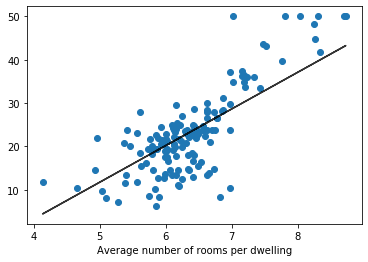

In [27]:
plt.scatter(xtest[:,5], ytest)
plt.plot(xtest[:,5].reshape(-1,1), y_pre, color = 'black', alpha=0.8)
plt.xlabel('Average number of rooms per dwelling')

In [21]:
print(f'Mean square error: {mean_squared_error(ytest, y_pre)}')

Mean square error: 36.517214730838624


# Logistic Regression (Wine)

In [8]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [30]:
LGR = LogisticRegression(random_state=1, C=1)
score = cross_val_score(LGR, wine.data, wine.target, cv = 5).mean()
print(f'Cross validation score of wine_dataset: {score}')

Cross validation score of wine_dataset: 0.9615615615615616
